# Train Data - Object Detection

## Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense


### Define paths and parameters

In [4]:
train_data_dir = r'C:\Users\muhri\Untitled Folder 1\ML\train_images_category'
test_data_dir = r'C:\Users\muhri\Untitled Folder 1\ML\test_images_category'
img_width, img_height = 200, 200  # increased the size to better capture features
batch_size = 32  # increase the batch size for faster training
num_classes = 15  # number of output classes
epochs = 50  # number of training epochs

### Reshaping images

In [5]:
if tf.keras.backend.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Defining sequential model

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])


### Augmentation configuration we will use for training

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

### Augmentation configuration we will use for testing (just rescaling)

In [8]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1600 images belonging to 15 classes.
Found 400 images belonging to 15 classes.


### Generator for training data

In [9]:
model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

C:\Users\muhri\AppData\Local\Temp\ipykernel_14328\3807075839.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/50
50/50 [==============================] - 55s 1s/step - loss: 2.4555 - accuracy: 0.2650 - val_loss: 2.3928 - val_accuracy: 0.2682
Epoch 2/50
50/50 [==============================] - 40s 791ms/step - loss: 2.3202 - accuracy: 0.2794 - val_loss: 2.1744 - val_accuracy: 0.2891
Epoch 3/50
50/50 [==============================] - 35s 703ms/step - loss: 2.2417 - accuracy: 0.2912 - val_loss: 2.1645 - val_accuracy: 0.3229
Epoch 4/50
50/50 [==============================] - 35s 702ms/step - loss: 2.1913 - accuracy: 0.3206 - val_loss: 2.0619 - val_accuracy: 0.3385
Epoch 5/50
50/50 [==============================] - 35s 700ms/step - loss: 2.0970 - accuracy: 0.3500 - val_loss: 2.0916 - val_accuracy: 0.3229
Epoch 6/50
50/50 [==============================] - 35s 704ms/step - loss: 2.0815 - accuracy: 0.3619 - val_loss: 2.0440 - val_accuracy: 0.3151
Epoch 7/50
50/50 [==============================] - 35s 705ms/step - loss: 2.0430 - accuracy: 0.3581 - val_loss: 2.0172 - val_accuracy: 0.3542
Ep

Plotted images for the 

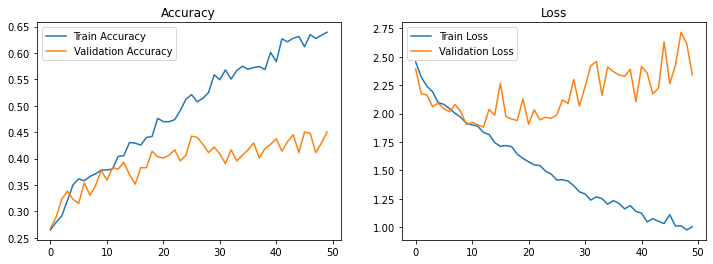

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

Save as H5

In [ ]:
model.save('cnn_object_detection.h5')